In [1]:
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

au2ev = 27.2113245

water_xyz = """3

O       0.0000000000     0.1178336003     0.0000000000
H      -0.7595754146    -0.4713344012     0.0000000000
H       0.7595754146    -0.4713344012     0.0000000000 
"""

# Prepare molecule and basis objects
molecule = vlx.Molecule.read_xyz_string(water_xyz)
basis = vlx.MolecularBasis.read(molecule, "6-31G")

In [2]:
import py3Dmol as p3d
viewer = p3d.view(width=300, height=200)
viewer.addModel(water_xyz, 'xyz')
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick":{},"sphere": {"scale":0.25}})
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
# SCF settings and calculation
scf_drv = vlx.ScfRestrictedDriver()
scf_settings = {"conv_thresh": 1.0e-6}
method_settings = {"xcfun": "b3lyp"}
scf_drv.update_settings(scf_settings, method_settings)
scf_results = scf_drv.compute(molecule, basis)

# resolve four eigenstates
rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
rpa_solver.update_settings({"nstates": 6}, method_settings)
rpa_results = rpa_solver.compute(molecule, basis, scf_results)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Molecular grid with 40792 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205311 a.u. Time: 0.06 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -76.384872592259    0.0000000000      0.05814060      0.01079184      0.00000000                


                  2       -76.384686594376    0.0001859979      0.07420221      0.01375784      0.03127402                


                  3       -76.385180742153   -0.0004941478      0.00038519      0.00008834      0.01650959                


                  4       -76.385180774173   -0.0000000320      0.00007657      0.00002027      0.00029092                


                  5       -76.385180774932   -0.0000000008      0.00000194      0.00000051      0.00002929                


                  6       -76.385180774934   -0.0000000000      0.00000014      0.00000003      0.00000214                


                                                                                                                          
               *** SCF converged in 6 iterations. Time: 0.25 sec.                                                         
                                                                                                                          


               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :      -76.3851807749 a.u.                                              
               Electronic Energy                  :      -85.5413254944 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001389 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.968145 a.u.        -2.460780 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.968145 a.u.         2.460780 Debye                                     
                

                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 6                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Threshold         : 1.0e-12                                                  
                               Exchange-Correlation Functional : B3LYP                                                    
                

* Info * Using the B3LYP functional.                                                                                      
                                                                                                                          
         P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
                                                                                                                          
* Info * Using the Libxc library (v7.0.0).                                                                                
                                                                                                                          
         S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
                                                                                                                          
* Info * Using the following algorithm for XC numer

* Info * Molecular grid with 40792 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 6 gerade trial vectors in reduced space                                                                          
* Info * 6 ungerade trial vectors in reduced space                                                                        
                                                                                                                          
* Info * 12.42 kB of memory used for subspace procedure on the master node                                                
* Info * 2.29 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   1 * Residuals (Max,Min): 7.22e-01 and 6.04e-02                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 12 gerade trial vectors in reduced space                                                                         
* Info * 12 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 20.10 kB of memory used for subspace procedure on the master node                                                
* Info * 2.29 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   2 * Residuals (Max,Min): 4.84e-02 and 7.43e-04                                            
                

* Info * Processing 6 Fock builds...                                                                                      


                                                                                                                          
* Info * 18 gerade trial vectors in reduced space                                                                         
* Info * 18 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 27.82 kB of memory used for subspace procedure on the master node                                                
* Info * 2.29 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   3 * Residuals (Max,Min): 3.75e-03 and 8.17e-06                                            
                

* Info * Processing 5 Fock builds...                                                                                      


                                                                                                                          
* Info * 23 gerade trial vectors in reduced space                                                                         
* Info * 23 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 34.22 kB of memory used for subspace procedure on the master node                                                
* Info * 2.29 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   4 * Residuals (Max,Min): 1.52e-04 and 4.10e-06                                            
                

* Info * Processing 1 Fock build...                                                                                       


                                                                                                                          
* Info * 24 gerade trial vectors in reduced space                                                                         
* Info * 24 ungerade trial vectors in reduced space                                                                       
                                                                                                                          
* Info * 35.46 kB of memory used for subspace procedure on the master node                                                
* Info * 2.29 GB of memory available for the solver on the master node                                                    
                                                                                                                          
               *** Iteration:   5 * Residuals (Max,Min): 1.55e-05 and 4.10e-06                                            
                

               *** Linear response converged in 5 iterations. Time: 0.61 sec                                              
                                                                                                                          
                                                                                                                          


               Electric Transition Dipole Moments (dipole length, a.u.)                                                   
               --------------------------------------------------------                                                   
                                                X            Y            Z                                               
               Excited State    S1:      0.000000     0.000000     0.243207                                               
               Excited State    S2:     -0.000000     0.630802    -0.000000                                               
               Excited State    S3:     -0.000000     0.000000     0.000000                                               
               Excited State    S4:     -0.535698    -0.000000    -0.000000                                               
               Excited State    S5:     -1.075243     0.000000     0.000000                                               
               E

               Electric Transition Dipole Moments (dipole velocity, a.u.)                                                 
               ----------------------------------------------------------                                                 
                                                X            Y            Z                                               
               Excited State    S1:      0.000000     0.000000     0.458646                                               
               Excited State    S2:     -0.000000     0.838675    -0.000000                                               
               Excited State    S3:     -0.000000     0.000000     0.000000                                               
               Excited State    S4:     -0.612311    -0.000000    -0.000000                                               
               Excited State    S5:     -1.040765     0.000000     0.000000                                               
               E

               Magnetic Transition Dipole Moments (a.u.)                                                                  
               -----------------------------------------                                                                  
                                                X            Y            Z                                               
               Excited State    S1:     -0.120410    -0.000000    -0.000000                                               
               Excited State    S2:     -0.000000    -0.000000     0.000000                                               
               Excited State    S3:     -0.000000     0.175860     0.000000                                               
               Excited State    S4:     -0.000000    -0.000000     0.207108                                               
               Excited State    S5:     -0.000000    -0.000000    -0.040413                                               
               E

               One-Photon Absorption                                                                                      
               ---------------------                                                                                      
               Excited State    S1:      0.28615365 a.u.      7.78664 eV    Osc.Str.    0.0113                            
               Excited State    S2:      0.36383134 a.u.      9.90036 eV    Osc.Str.    0.0965                            
               Excited State    S3:      0.36445906 a.u.      9.91744 eV    Osc.Str.    0.0000                            
               Excited State    S4:      0.45391821 a.u.     12.35174 eV    Osc.Str.    0.0868                            
               Excited State    S5:      0.54044302 a.u.     14.70620 eV    Osc.Str.    0.4166                            
               Excited State    S6:      0.66642151 a.u.     18.13425 eV    Osc.Str.    0.2438                            
                

               Electronic Circular Dichroism                                                                              
               -----------------------------                                                                              
               Excited State    S1:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S2:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
               Excited State    S3:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S4:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S5:     Rot.Str.      0.000000 a.u.     0.0000 [10**(-40) cgs]                            
               Excited State    S6:     Rot.Str.     -0.000000 a.u.    -0.0000 [10**(-40) cgs]                            
                

               Character of excitations:                                                                                  
                                                                                                                          
               Excited state 1                                                                                            
               ---------------                                                                                            
               HOMO     -> LUMO         1.0001                                                                            
                                                                                                                          
               Excited state 2                                                                                            
               ---------------                                                                                            
               H

In [4]:
print("Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)")
for i in np.arange(len(rpa_results["eigenvalues"])):
    e, os, x, y, z = (
        rpa_results["eigenvalues"][i],
        rpa_results["oscillator_strengths"][i],
        rpa_results["electric_transition_dipoles"][i][0],
        rpa_results["electric_transition_dipoles"][i][1],
        rpa_results["electric_transition_dipoles"][i][2],
    )
    print("   {:.3f}     {:8.5f}  {:8.5f}  {:8.5f}  {:8.5f}".format(e, os, x, y, z))

Energy [au]  Osc. str.   TM(x)     TM(y)     TM(z)


   0.286      0.01128   0.00000   0.00000   0.24321
   0.364      0.09652  -0.00000   0.63080  -0.00000
   0.364      0.00000  -0.00000   0.00000   0.00000
   0.454      0.08684  -0.53570  -0.00000  -0.00000
   0.540      0.41655  -1.07524   0.00000   0.00000
   0.666      0.24377   0.00000   0.74073  -0.00000


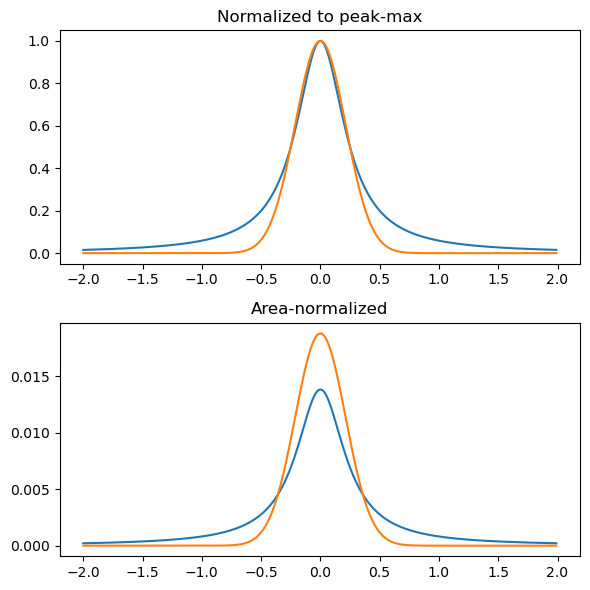

In [5]:
def lorentzian(x, y, xmin, xmax, xstep, gamma):
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)):
            yi[i] = (
                yi[i]
                + y[k] * gamma / ((xi[i] - x[k]) ** 2 + (gamma / 2.0) ** 2) / np.pi
            )
    return xi, yi


def gaussian(x, y, xmin, xmax, xstep, sigma):
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(y)):
            yi[i] = yi[i] + y[k] * np.e ** (-((xi[i] - x[k]) ** 2) / (2 * sigma ** 2))
    return xi, yi

X = [0,0,0]
Y = [0,1,0]

plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Normalized to peak-max')
xi, yi = lorentzian(X, Y, -2, 2, 0.01, 0.5)
plt.plot(xi, yi/max(yi), label='Lorentzian')
xi, yi = gaussian(X, Y, -2, 2, 0.01, 0.5 / np.sqrt(4*2*np.log(2)))
plt.plot(xi, yi/max(yi), label='Gaussian')

plt.subplot(212)
plt.title('Area-normalized')
xi, yi = lorentzian(X, Y, -2, 2, 0.01, 0.5)
plt.plot(xi, yi/sum(yi), label='Lorentzian')
xi, yi = gaussian(X, Y, -2, 2, 0.01, 0.5 / np.sqrt(4*2*np.log(2)))
plt.plot(xi, yi/sum(yi), label='Gaussian')
plt.tight_layout()
plt.show()